In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
path1 = '/Users/zamiulalam/Documents/Fraud/ieee-fraud-detection/train_identity.csv'
path2 = '/Users/zamiulalam/Documents/Fraud/ieee-fraud-detection/train_transaction.csv'
path3 = '/Users/zamiulalam/Documents/Fraud/ieee-fraud-detection/test_identity.csv'
path4 = '/Users/zamiulalam/Documents/Fraud/ieee-fraud-detection/test_transaction.csv'

id = pd.read_csv(path1)
tranz = pd.read_csv(path2)
#id_test = pd.read_csv(path3)
tranz_test = pd.read_csv(path4)

In [3]:
pd.set_option('display.max_columns', 150)

id.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   
1    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound  166.0    NaN   
2    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found  121.0    NaN   
3    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound  225.0    NaN   
4    0.0    0.0  100.0  NotFound    NaN -300.0  Found     Found  166.0   15.0   

   id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28  \
0  542.0  144.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  621.0  500.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
2  410.0  142.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
3  176.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
4  529.0  575.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   

      id_29             id_30                id_31  id_32      id_33  \
0  NotFound       Android 7.0  samsung browser 6.2   32.0  2220x1080   
1  NotFound        iOS 11.1.2   mobile safari 11.0   32.0   1334x750   
2     Found               NaN          chrome 62.0    NaN        NaN   
3  NotFound               NaN          chrome 62.0    NaN        NaN   
4     Found  Mac OS X 10_11_6          chrome 62.0   24.0   1280x800   

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2     T     F     T     T     mobile   
1  match_status:1     T     F     F     T     mobile   
2             NaN     F     F     T     T    desktop   
3             NaN     F     F     T     T    desktop   
4  match_status:2     T     F     T     T    desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS

In [4]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [5]:
#Find the number of missing values in each column
miss_val_id = id.isnull().sum()

#Turn the missing value counts into percentages
miss_val_per_id = (miss_val_id/ len(id))*100

#Return counts and percentages of missing values in each column
miss_data_id = pd.DataFrame({'Missing Values': miss_val_id,'Percentage (%)':miss_val_per_id})

#Sort values in ascending order 
miss_data_id.sort_values(by='Percentage (%)', ascending=True)

Missing Values  Percentage (%)
TransactionID               0        0.000000
id_01                       0        0.000000
id_12                       0        0.000000
id_38                    3248        2.251912
id_37                    3248        2.251912
id_36                    3248        2.251912
id_35                    3248        2.251912
id_15                    3248        2.251912
id_29                    3255        2.256765
id_28                    3255        2.256765
id_11                    3255        2.256765
id_02                    3361        2.330257
DeviceType               3423        2.373243
id_31                    3951        2.739318
id_17                    4864        3.372321
id_19                    4915        3.407681
id_20                    4972        3.447200
id_05                    7368        5.108401
id_06                    7368        5.108401
id_16                   14893       10.325654
id_13                   16913       11.726165
DeviceInfo              25567       17.726179
id_14                   64189       44.503685
id_34                   66428       46.056034
id_32                   66647       46.207872
id_30                   66668       46.222432
id_09                   69307       48.052110
id_10                   69307       48.052110
id_33                   70944       49.187079
id_03                   77909       54.016071
id_04                   77909       54.016071
id_18                   99120       68.722137
id_23                  139064       96.416215
id_27                  139064       96.416215
id_22                  139064       96.416215
id_26                  139070       96.420375
id_21                  139074       96.423149
id_08                  139078       96.425922
id_07                  139078       96.425922
id_25                  139101       96.441868
id_24                  139486       96.708798

In [6]:
tranz.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  ...  V265  V266  V267  V268  V269  V270  \
0  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   V271  V272  V273  V274  V275  V276  V277  V278  V279  V280  V281  V282  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0  28.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

   V283  V284  V285  V286  V287  V288  V289  V290  V291  V292  V293  V294  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0 

In [7]:
tranz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [8]:
for col, values in tranz.items():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[0 1]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 27

In [9]:
#Find the number of missing values in each column
miss_val_tranz = tranz.isnull().sum()

#Turn the missing value counts into percentages
miss_val_per_tranz = (miss_val_tranz/ len(tranz))*100

#Return counts and percentages of missing values in each column
miss_data_tranz = pd.DataFrame({'MIssing Values': miss_val_tranz,'Percentage (%)':miss_val_per_tranz})

#Sort values in ascending order 
miss_data_tranz = miss_data_tranz.sort_values(by='Percentage (%)', ascending=True)

miss_data_tranz.head(80)

MIssing Values  Percentage (%)
TransactionID               0        0.000000
C14                         0        0.000000
C13                         0        0.000000
C12                         0        0.000000
C11                         0        0.000000
...                       ...             ...
V137                      314        0.053172
V136                      314        0.053172
V135                      314        0.053172
V134                      314        0.053172
V133                      314        0.053172

[80 rows x 2 columns]

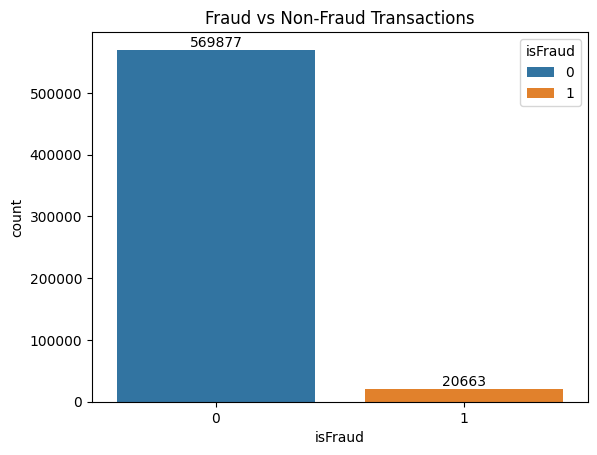

In [10]:
# Distribution of target variable
ax = sns.countplot(x='isFraud', data= tranz, hue = 'isFraud')
plt.title('Fraud vs Non-Fraud Transactions')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

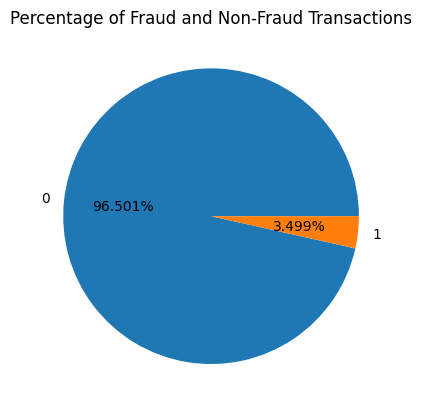

In [11]:
# get the set of distinct classes
labels = tranz.isFraud.unique()

# get the count of each class
sizes = tranz.isFraud.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Percentage of Fraud and Non-Fraud Transactions')
plt.show()

In [91]:
(tranz['TransactionDT'].max() - tranz['TransactionDT'].min())/ 86400

Timedelta('0 days 00:03:01.999201388')

In [92]:
tranz['TransactionDT'] = pd.to_datetime(tranz['TransactionDT'], unit='s', origin=pd.Timestamp('2000-01-01'))
tranz_test['TransactionDT'] = pd.to_datetime(tranz_test['TransactionDT'], unit='s', origin=pd.Timestamp('2000-01-01'))

ValueError: '0        2000-01-02 00:00:00
1        2000-01-02 00:00:01
2        2000-01-02 00:01:09
3        2000-01-02 00:01:39
4        2000-01-02 00:01:46
                 ...        
590535   2000-07-01 23:57:27
590536   2000-07-01 23:57:29
590537   2000-07-01 23:57:59
590538   2000-07-01 23:58:08
590539   2000-07-01 23:58:51
Name: TransactionDT, Length: 590540, dtype: datetime64[ns]' is not compatible with origin='2000-01-01 00:00:00'; it must be numeric with a unit specified

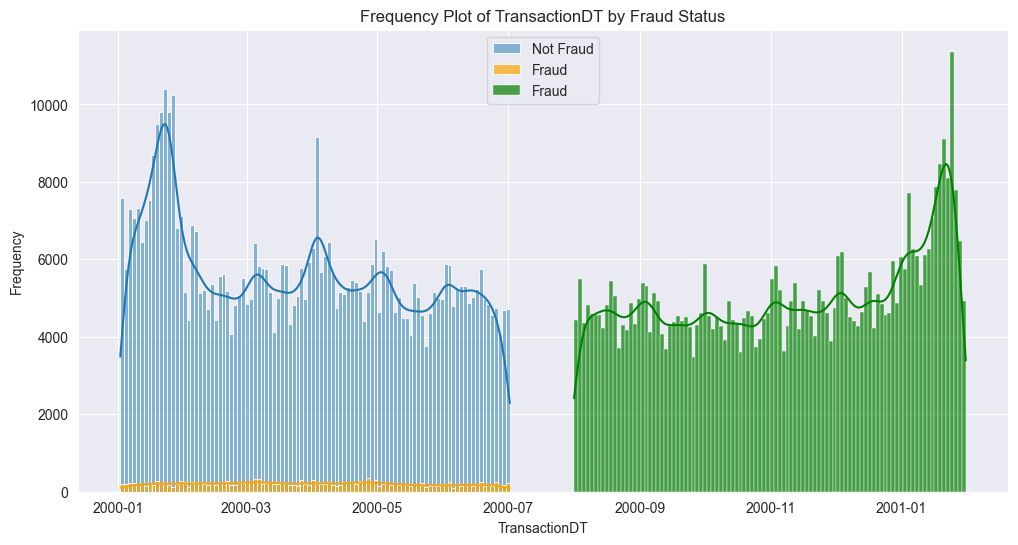

In [93]:
plt.figure(figsize=(12, 6))
sns.histplot(tranz[tranz['isFraud'] == 0]['TransactionDT'], bins=100, kde=True, color='tab:blue', label='Not Fraud', alpha=0.5)
sns.histplot(tranz[tranz['isFraud'] == 1]['TransactionDT'], bins=100, kde=True, color='orange', label='Fraud', alpha=0.7)
sns.histplot(tranz_test['TransactionDT'], bins=100, kde=True, color='green', label='Fraud', alpha=0.7)
plt.title('Frequency Plot of TransactionDT by Fraud Status')
plt.xlabel('TransactionDT')
plt.ylabel('Frequency')
plt.legend()
plt.show()

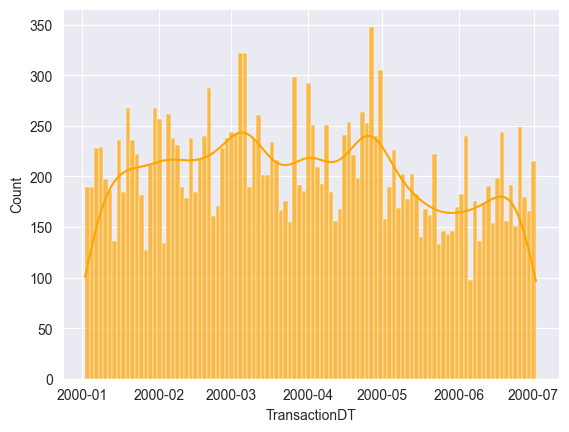

In [94]:
sns.histplot(tranz[tranz['isFraud'] == 1]['TransactionDT'], bins=100, kde=True, color='orange', label='Fraud', alpha=0.7)
plt.show()

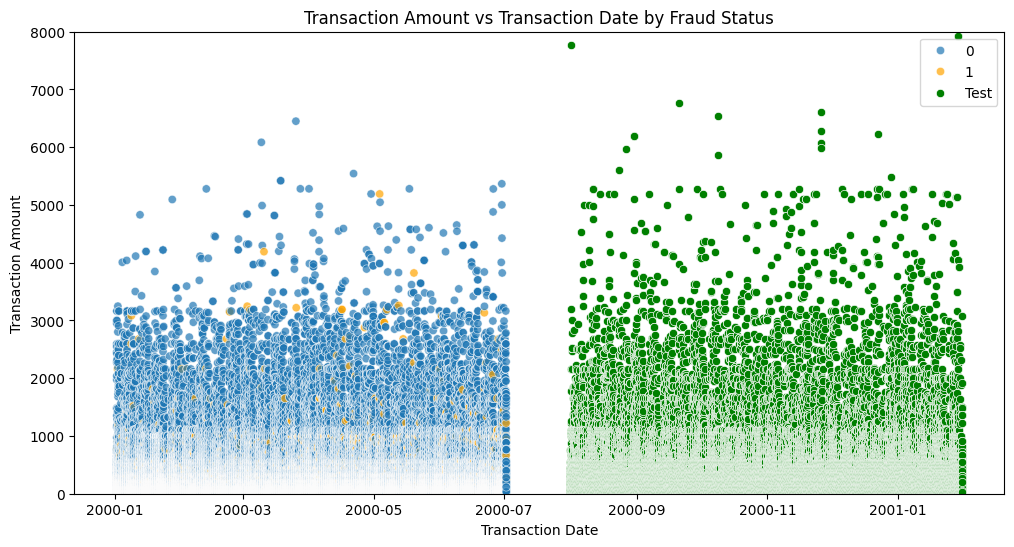

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(
    data=tranz, 
    x='TransactionDT', 
    y='TransactionAmt', 
    hue='isFraud', 
    palette={0: 'tab:blue', 1: 'orange'}, 
    alpha=0.7
)

sns.scatterplot(
    data=tranz_test, 
    x='TransactionDT', 
    y='TransactionAmt', 
    color='green', 
    label='Test', 
    ax=ax
)

plt.title('Transaction Amount vs Transaction Date by Fraud Status')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.ylim(0,8000)
plt.show()

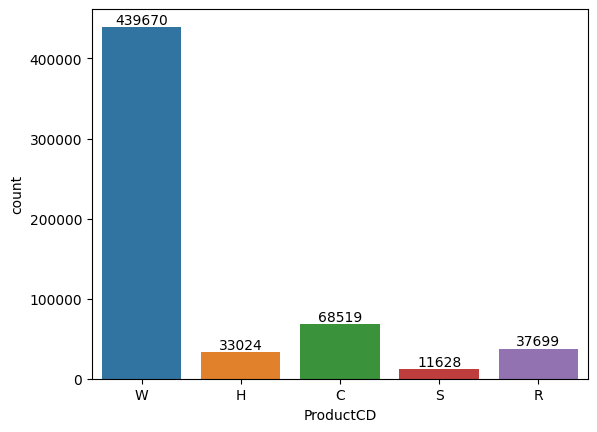

In [24]:
ax = sns.countplot(x='ProductCD', data=tranz, hue='ProductCD')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [27]:
tranz.head()

TransactionID  isFraud       TransactionDT  TransactionAmt ProductCD  \
0        2987000        0 2000-01-02 00:00:00            68.5         W   
1        2987001        0 2000-01-02 00:00:01            29.0         W   
2        2987002        0 2000-01-02 00:01:09            59.0         W   
3        2987003        0 2000-01-02 00:01:39            50.0         W   
4        2987004        0 2000-01-02 00:01:46            50.0         H   

   card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0  13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1   2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2   4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4   4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  ...  V265  V266  V267  V268  V269  V270  \
0  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   V271  V272  V273  V274  V275  V276  V277  V278  V279  V280  V281  V282  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0  28.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

   V283  V284  V285  V286  V287  V288  V289  V290  V291  V292  V293  V294  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
2   1.0   0.0 

In [74]:
feats = []

In [75]:
def col_eda(col_prefix, start, end):
	cols = tranz[[f'{col_prefix}{i}' for i in range(start, end+1)]].copy()

	# Map 'T' to 1, 'F' to 0
	cols = cols.map(lambda x: 1 if x == 'T' else 0 if x == 'F' else x)

	# Find the number of missing values in each column
	miss_val_cols = cols.isnull().sum()
	miss_val_per_cols = (miss_val_cols / len(cols)) * 100
	miss_data_cols = pd.DataFrame({'Missing Values': miss_val_cols, 'Percentage (%)': miss_val_per_cols})

	cols['isFraud'] = tranz['isFraud']

	# Fill missing values before converting to int
	cols = cols.fillna(-999)
	for col in cols.columns:
		if cols[col].dtype == 'object':
			cols[col] = pd.factorize(cols[col])[0]
		else:
			cols[col] = cols[col].astype(int)

	corr_matrix = cols.corr()

	plt.figure(figsize=(10, 10))
	sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
	plt.title(f"Correlation Heatmap for {col_prefix}")
	plt.show()

	corr_vals = cols.corr()['isFraud'].drop('isFraud')
	corr_vals.plot(kind='barh')

	
	print(miss_data_cols.sort_values(by='Percentage (%)', ascending=True))
	print('\n')
	print('Columns 50 percent of whose data is not nan :')
	print(miss_data_cols[miss_data_cols['Percentage (%)'] < 50].index.tolist())

	for col in miss_data_cols[miss_data_cols['Percentage (%)'] < 50].index.tolist():
		feats.append(col)

	print('\n')
	print(cols)

	

	return

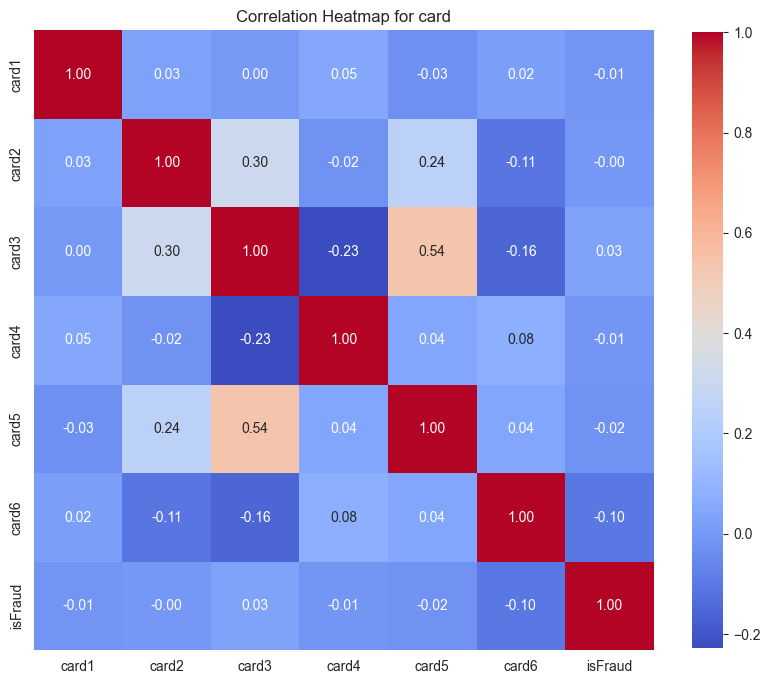

       Missing Values  Percentage (%)
card1               0        0.000000
card3            1565        0.265012
card6            1571        0.266028
card4            1577        0.267044
card5            4259        0.721204
card2            8933        1.512683


Columns 50 percent of whose data is not nan :
['card1', 'card2', 'card3', 'card4', 'card5', 'card6']


        card1  card2  card3  card4  card5  card6  isFraud
0       13926   -999    150      0    142      0        0
1        2755    404    150      1    102      0        0
2        4663    490    150      2    166      1        0
3       18132    567    150      1    117      1        0
4        4497    514    150      1    102      0        0
...       ...    ...    ...    ...    ...    ...      ...
590535   6550   -999    150      2    226      1        0
590536  10444    225    150      1    224      1        0
590537  12037    595    150      1    224      1        0
590538   7826    481    150      1    224      1 

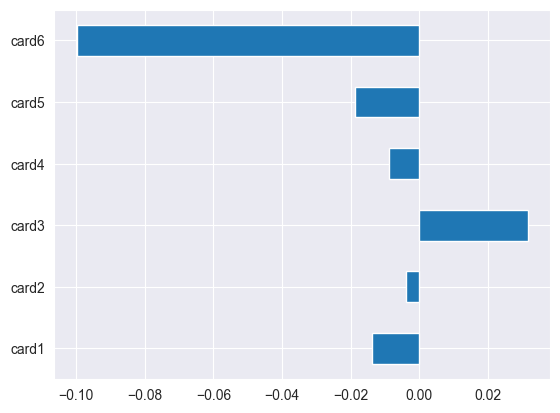

In [77]:
col_eda('card',1,6)

In [35]:
print(len(sorted(tranz['addr1'].unique())))

print(sorted(tranz['addr1'].unique()))

333
[100.0, 101.0, 122.0, 123.0, 126.0, 143.0, 158.0, 170.0, 177.0, 181.0, 184.0, 191.0, 204.0, 205.0, 220.0, 225.0, 226.0, 231.0, 251.0, 264.0, 269.0, 272.0, 299.0, 308.0, 310.0, 315.0, 325.0, 327.0, 330.0, 337.0, 343.0, 387.0, 420.0, 433.0, 436.0, 441.0, 469.0, 472.0, 476.0, nan, 102.0, 104.0, 105.0, 106.0, 110.0, 111.0, 112.0, 113.0, 117.0, 119.0, 120.0, 124.0, 125.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 137.0, 139.0, 141.0, 142.0, 144.0, 145.0, 146.0, 148.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 166.0, 167.0, 168.0, 171.0, 172.0, 174.0, 178.0, 180.0, 182.0, 183.0, 185.0, 187.0, 189.0, 190.0, 193.0, 194.0, 195.0, 196.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203.0, 206.0, 208.0, 210.0, 211.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 221.0, 223.0, 224.0, 227.0, 232.0, 233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 239.0, 241.0, 242.0, 243.0, 244.0, 245.0, 247.0, 248.0, 249.0, 250.0, 252.0, 253.0, 254.0, 255.0, 257

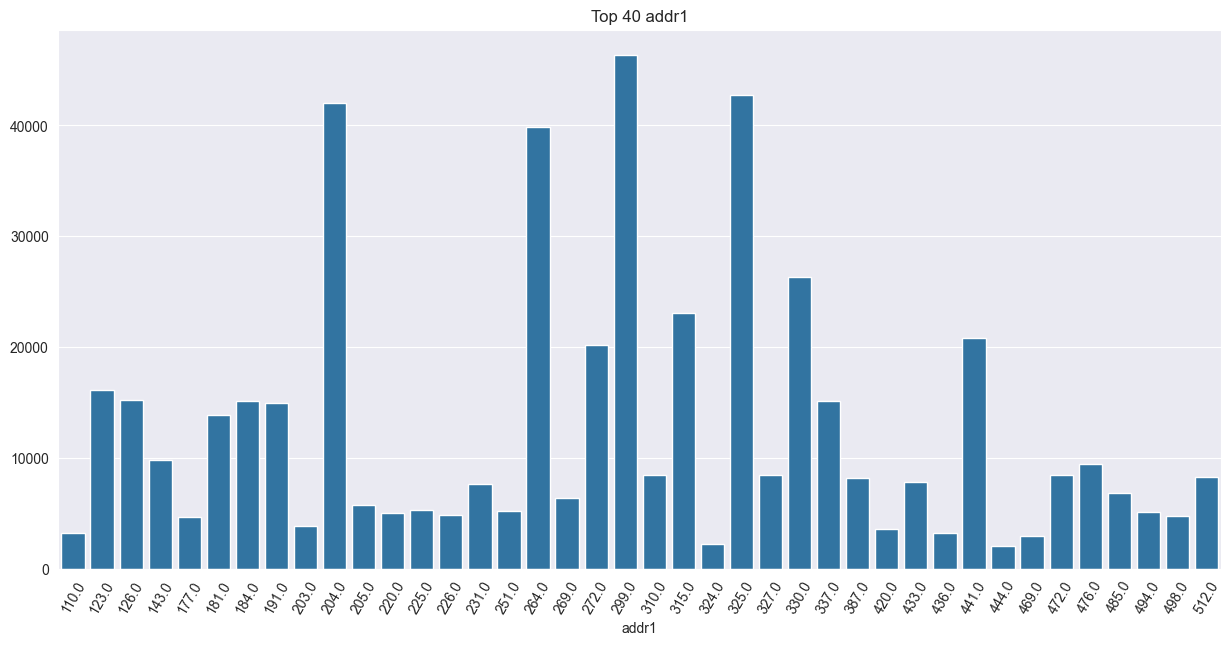

In [36]:
#Plot a Bar Chart
addr1_count = tranz['addr1'].value_counts().head(40)

plt.figure(figsize=(15, 7))
sns.set_style("darkgrid")

sns.barplot(x = addr1_count.index ,y = addr1_count.values)
plt.title('Top 40 addr1')
plt.xticks(rotation = 60)
plt.show()

In [37]:
print(len(sorted(tranz['addr2'].unique())))

print(sorted(tranz['addr2'].unique()))

75
[10.0, 87.0, nan, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 34.0, 35.0, 36.0, 38.0, 39.0, 40.0, 43.0, 44.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 57.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0, 66.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 82.0, 83.0, 84.0, 86.0, 88.0, 89.0, 92.0, 93.0, 94.0, 96.0, 97.0, 98.0, 100.0, 101.0, 102.0]


<Axes: xlabel='addr2'>

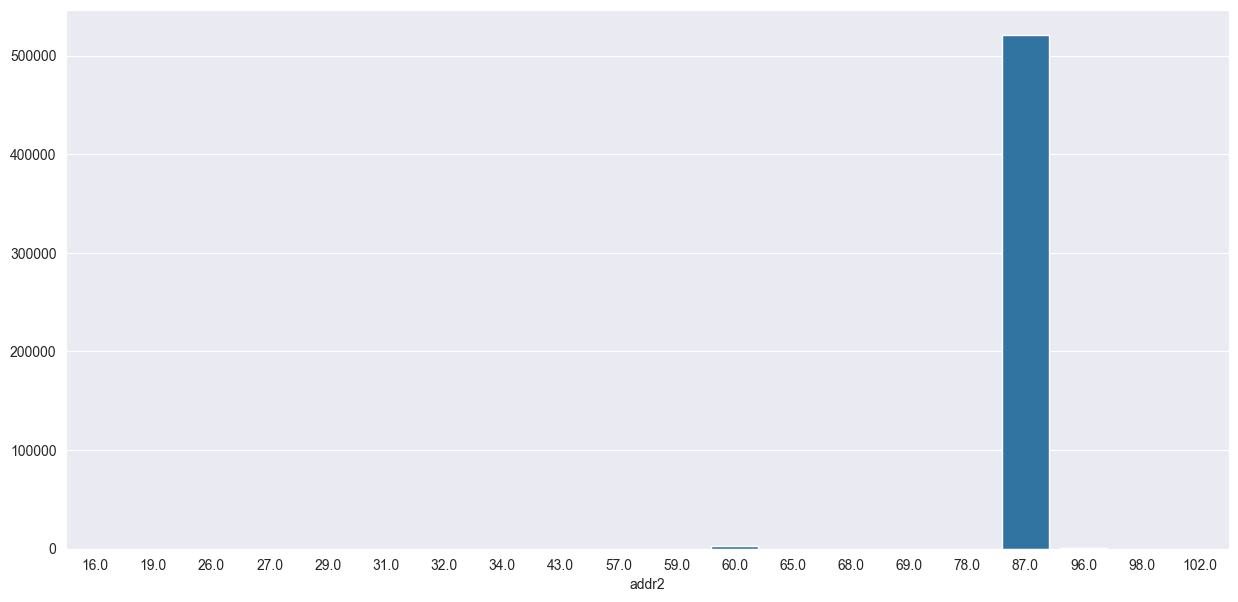

In [38]:
#Plot a Bar Chart
addr2_count = tranz['addr2'].value_counts().head(20)

plt.figure(figsize=(15, 7))
sns.set_style("darkgrid")

sns.barplot(x = addr2_count.index ,y = addr2_count.values)

In [39]:
tranz['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [41]:
domnf = tranz[tranz['isFraud'] == 0]['P_emaildomain'].value_counts() #.head(15)
domf = tranz[tranz['isFraud'] == 1]['P_emaildomain'].value_counts() #.head(15)

# Create DataFrames from domnf and domf
domnf_df = domnf.reset_index(inplace = False)
domnf_df.columns = ['P_emaildomain', 'Non-Fraud Count']
domnf_df = domnf_df.sort_values(by='Non-Fraud Count')

domf_df = domf.reset_index(inplace = False)
domf_df.columns = ['P_emaildomain', 'Fraud Count']
domf_df = domf_df.sort_values(by='Fraud Count')

# Merge the two DataFrames on the P_emaildomain column
merged_df = pd.merge(domnf_df, domf_df, on='P_emaildomain', how='outer')

# Sort merged_df by descending order of 'Non-Fraud Count' and 'Fraud Count'
merged_df = merged_df.sort_values(by=['Non-Fraud Count', 'Fraud Count'], ascending=False).reset_index(drop = True)

# Display the resulting DataFrame
#merged_df

merged_df['Percentage'] = merged_df['Fraud Count']/(merged_df['Non-Fraud Count'] + merged_df['Fraud Count'])*100

merged_df['Percentage'] = merged_df['Fraud Count']/(merged_df['Non-Fraud Count'] + merged_df['Fraud Count'])*100

merged_df.sort_values(by = ['Percentage'], ascending = False).reset_index(drop = True)

P_emaildomain  Non-Fraud Count  Fraud Count  Percentage
0     protonmail.com               45         31.0   40.789474
1           mail.com              453        106.0   18.962433
2         outlook.es              381         57.0   13.013699
3            aim.com              275         40.0   12.698413
4        outlook.com             4614        482.0    9.458399
5         hotmail.es              285         20.0    6.557377
6        live.com.mx              708         41.0    5.473965
7        hotmail.com            42854       2396.0    5.295028
8          gmail.com           218412       9943.0    4.354185
9           yahoo.fr              138          5.0    3.496503
10    embarqmail.com              251          9.0    3.461538
11           mac.com              422         14.0    3.211009
12        icloud.com             6070        197.0    3.143450
13       comcast.net             7642        246.0    3.118661
14       charter.net              791         25.0    3.063725
15      frontier.com              272          8.0    2.857143
16     bellsouth.net             1856         53.0    2.776323
17          live.com             2957         84.0    2.762249
18   frontiernet.net              190          5.0    2.564103
19     anonymous.com            36139        859.0    2.321747
20    suddenlink.net              171          4.0    2.285714
21         yahoo.com            98637       2297.0    2.275745
22             gmail              485         11.0    2.217742
23           msn.com             4002         90.0    2.199413
24           aol.com            27672        617.0    2.181060
25     earthlink.net              503         11.0    2.140078
26         ymail.com             2346         50.0    2.086811
27           cox.net             1364         29.0    2.081838
28      cableone.net              156          3.0    1.886792
29          juno.com              316          6.0    1.863354
30            me.com             1495         27.0    1.773982
31     optonline.net              994         17.0    1.681503
32          yahoo.es              132          2.0    1.492537
33      yahoo.com.mx             1527         16.0    1.036941
34    roadrunner.com              302          3.0    0.983607
35       verizon.net             2683         22.0    0.813309
36           att.net             4003         30.0    0.743863
37         sc.rr.com              163          1.0    0.609756
38       netzero.net              195          1.0    0.510204
39    prodigy.net.mx              206          1.0    0.483092
40     sbcglobal.net             2958         12.0    0.404040
41    rocketmail.com              662          2.0    0.301205
42    windstream.net              305          NaN         NaN
43        hotmail.fr              295          NaN         NaN
44            web.de              240          NaN         NaN
45       netzero.com              230          NaN         NaN
46           twc.com              230          NaN         NaN
47   centurylink.net              205          NaN         NaN
48             q.com              189          NaN         NaN
49        cfl.rr.com              172          NaN         NaN
50            gmx.de              149          NaN         NaN
51     hotmail.co.uk              112          NaN         NaN
52          yahoo.de               74          NaN         NaN
53           ptd.net               68          NaN         NaN
54           live.fr               56          NaN         NaN
55       yahoo.co.uk               49          NaN         NaN
56        hotmail.de               43          NaN         NaN
57  servicios-ta.com               35          NaN         NaN
58       yahoo.co.jp               32          NaN         NaN

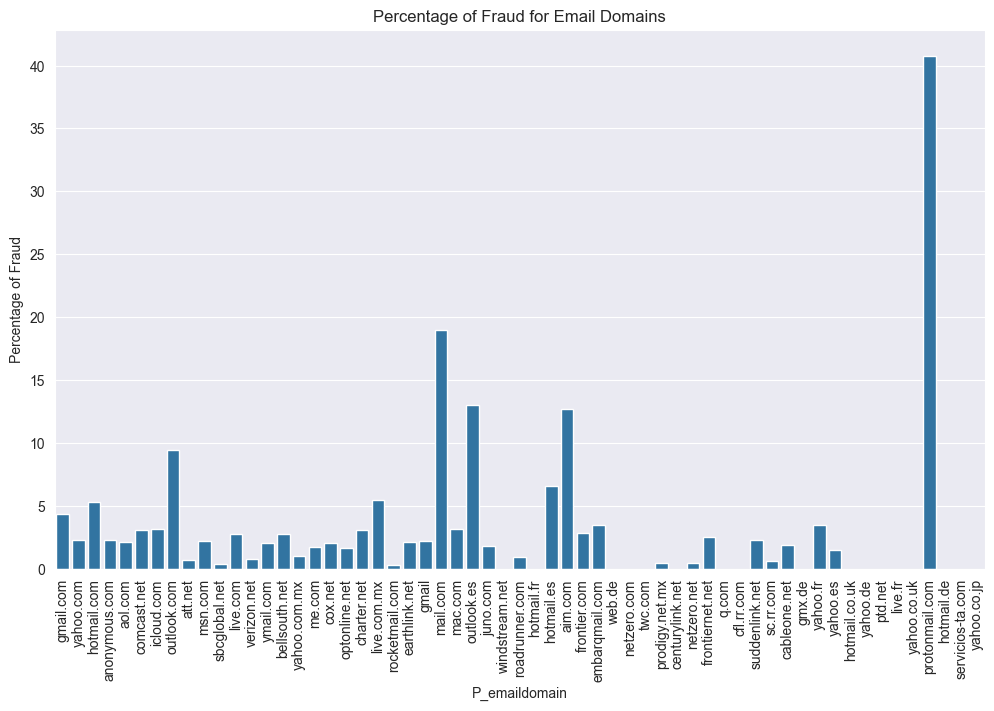

In [42]:
plt.figure(figsize = (12,7))

sns.barplot(data = merged_df, x = 'P_emaildomain', y = 'Percentage')
plt.ylabel('Percentage of Fraud')
plt.title('Percentage of Fraud for Email Domains')
plt.xticks(rotation = 90)
plt.show()

In [43]:
tranz.head()

TransactionID  isFraud       TransactionDT  TransactionAmt ProductCD  \
0        2987000        0 2000-01-02 00:00:00            68.5         W   
1        2987001        0 2000-01-02 00:00:01            29.0         W   
2        2987002        0 2000-01-02 00:01:09            59.0         W   
3        2987003        0 2000-01-02 00:01:39            50.0         W   
4        2987004        0 2000-01-02 00:01:46            50.0         H   

   card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0  13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1   2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2   4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4   4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  ...  V265  V266  V267  V268  V269  V270  \
0  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3  0.0  0.0  0.0  0.0  1.0  1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   V271  V272  V273  V274  V275  V276  V277  V278  V279  V280  V281  V282  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   0.0   1.0   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0  28.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

   V283  V284  V285  V286  V287  V288  V289  V290  V291  V292  V293  V294  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
2   1.0   0.0 

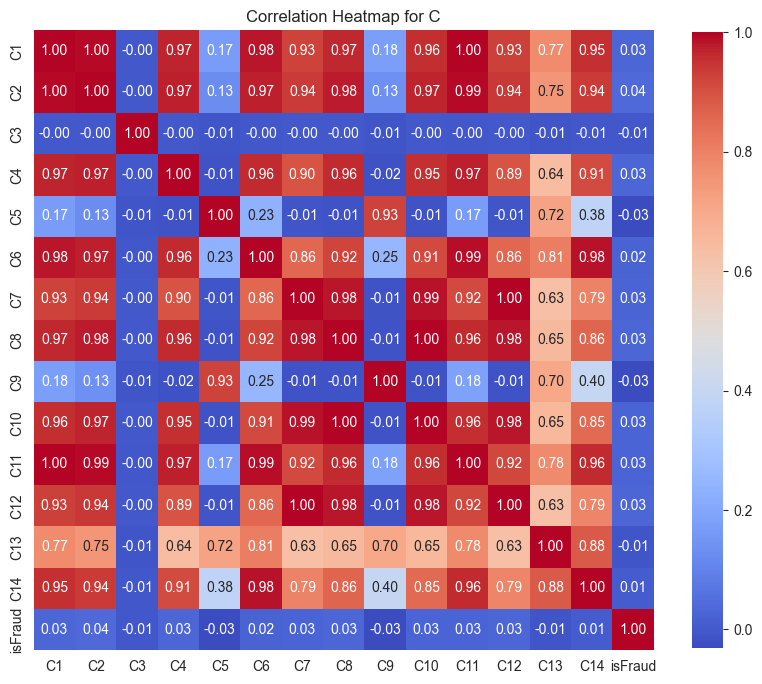

     Missing Values  Percentage (%)
C1                0             0.0
C2                0             0.0
C3                0             0.0
C4                0             0.0
C5                0             0.0
C6                0             0.0
C7                0             0.0
C8                0             0.0
C9                0             0.0
C10               0             0.0
C11               0             0.0
C12               0             0.0
C13               0             0.0
C14               0             0.0


Columns 50 percent of whose data is not nan :
['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


        C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12  C13  C14  isFraud
0        1   1   0   0   0   1   0   0   1    0    2    0    1    1        0
1        1   1   0   0   0   1   0   0   0    0    1    0    1    1        0
2        1   1   0   0   0   1   0   0   1    0    1    0    1    1        0
3        2  

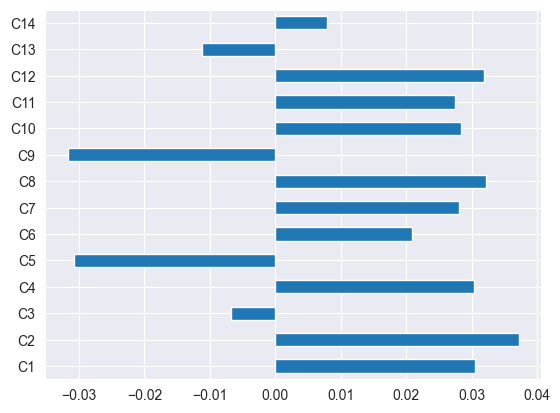

In [79]:
col_eda('C',1,14)

In [82]:
feats

['card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D10',
 'D11',
 'D15']

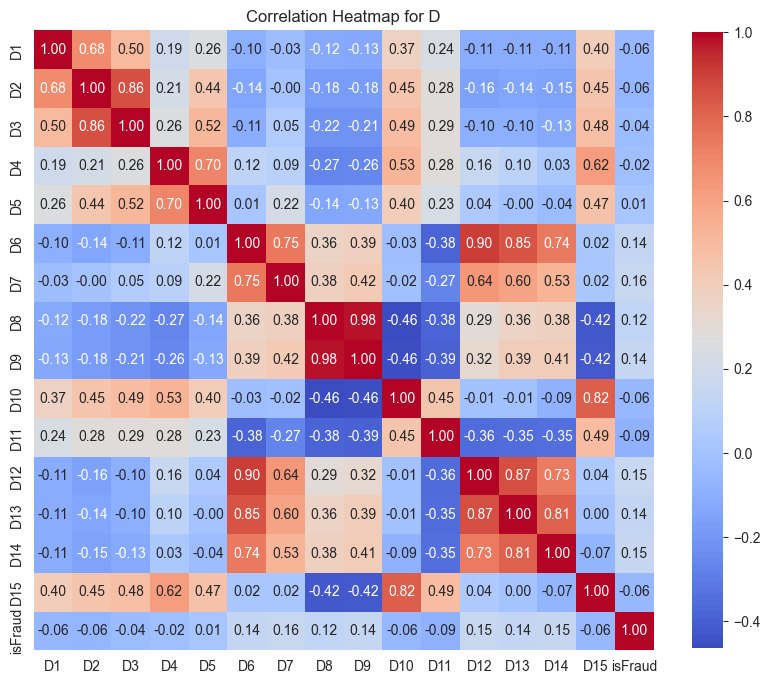

     Missing Values  Percentage (%)
D1             1269        0.214888
D10           76022       12.873302
D15           89113       15.090087
D4           168922       28.604667
D3           262878       44.514851
D11          279287       47.293494
D2           280797       47.549192
D5           309841       52.467403
D8           515614       87.312290
D9           515614       87.312290
D6           517353       87.606767
D12          525823       89.041047
D14          528353       89.469469
D13          528588       89.509263
D7           551623       93.409930


Columns 50 percent of whose data is not nan :
['D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15']


         D1   D2   D3   D4   D5   D6   D7   D8   D9  D10  D11  D12  D13  D14  \
0        14 -999   13 -999 -999 -999 -999 -999 -999   13   13 -999 -999 -999   
1         0 -999 -999    0 -999 -999 -999 -999 -999    0 -999 -999 -999 -999   
2         0 -999 -999    0 -999 -999 -999 -999 -999    0  315 -999 -999 -999   
3       

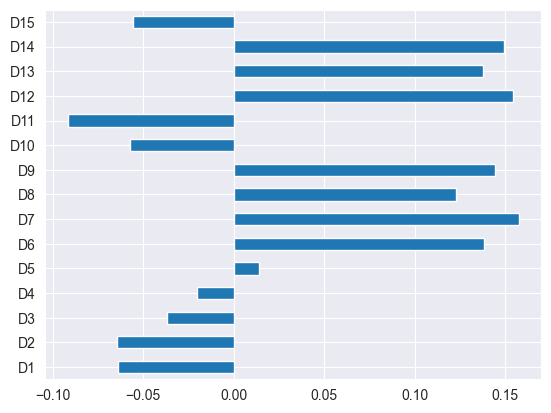

In [81]:
col_eda('D',1,15)

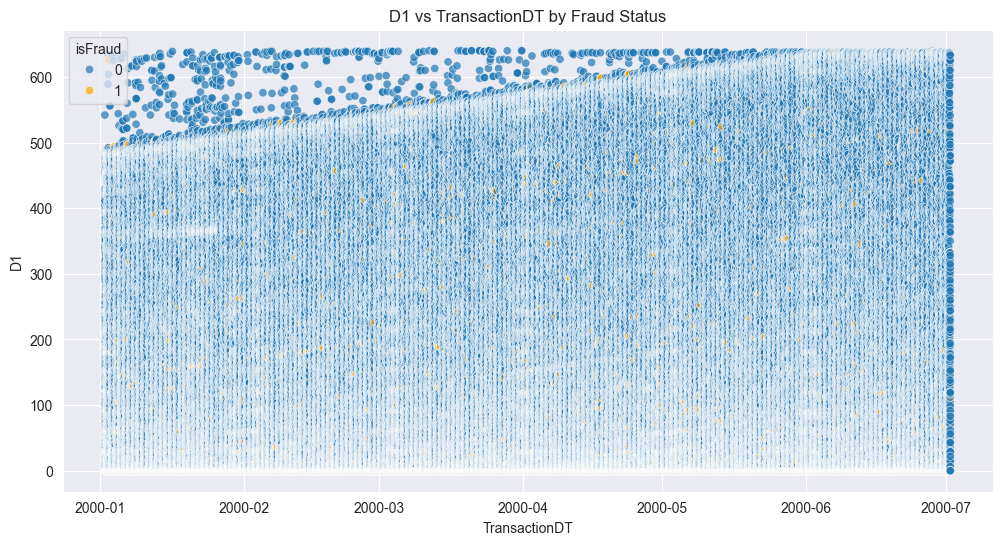

In [88]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=tranz,
    x='TransactionDT',
    y='D1',
    hue='isFraud',
    palette={0: 'tab:blue', 1: 'orange'},
    alpha=0.7,
    legend='auto'
)

plt.title('D1 vs TransactionDT by Fraud Status')
plt.xlabel('TransactionDT')
plt.ylabel('D1')
plt.legend(title='isFraud')
plt.show()

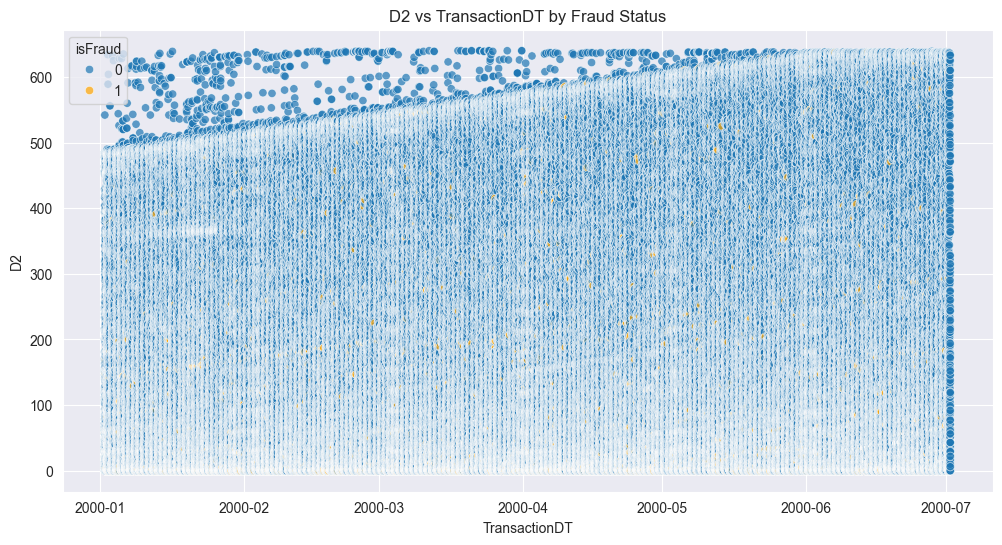

In [90]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=tranz,
    x='TransactionDT',
    y='D2',
    hue='isFraud',
    palette={0: 'tab:blue', 1: 'orange'},
    alpha=0.7,
    legend='auto'
)

plt.title('D2 vs TransactionDT by Fraud Status')
plt.xlabel('TransactionDT')
plt.ylabel('D2')
plt.legend(title='isFraud')
plt.show()

In [86]:
tranz.head(20)

TransactionID  isFraud       TransactionDT  TransactionAmt ProductCD  \
0         2987000        0 2000-01-02 00:00:00          68.500         W   
1         2987001        0 2000-01-02 00:00:01          29.000         W   
2         2987002        0 2000-01-02 00:01:09          59.000         W   
3         2987003        0 2000-01-02 00:01:39          50.000         W   
4         2987004        0 2000-01-02 00:01:46          50.000         H   
5         2987005        0 2000-01-02 00:01:50          49.000         W   
6         2987006        0 2000-01-02 00:02:02         159.000         W   
7         2987007        0 2000-01-02 00:02:09         422.500         W   
8         2987008        0 2000-01-02 00:02:15          15.000         H   
9         2987009        0 2000-01-02 00:02:16         117.000         W   
10        2987010        0 2000-01-02 00:02:29          75.887         C   
11        2987011        0 2000-01-02 00:02:35          16.495         C   
12        2987012        0 2000-01-02 00:02:44          50.000         W   
13        2987013        0 2000-01-02 00:03:05          40.000         W   
14        2987014        0 2000-01-02 00:03:16          10.500         W   
15        2987015        0 2000-01-02 00:03:38          57.950         W   
16        2987016        0 2000-01-02 00:03:40          30.000         H   
17        2987017        0 2000-01-02 00:04:28         100.000         H   
18        2987018        0 2000-01-02 00:05:25          47.950         W   
19        2987019        0 2000-01-02 00:05:30         186.000         W   

    card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0   13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1    2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2    4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3   18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4    4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
5    5937  555.0  150.0        visa  226.0   debit  272.0   87.0   36.0   
6   12308  360.0  150.0        visa  166.0   debit  126.0   87.0    0.0   
7   12695  490.0  150.0        visa  226.0   debit  325.0   87.0    NaN   
8    2803  100.0  150.0        visa  226.0   debit  337.0   87.0    NaN   
9   17399  111.0  150.0  mastercard  224.0   debit  204.0   87.0   19.0   
10  16496  352.0  117.0  mastercard  134.0  credit    NaN    NaN    NaN   
11   4461  375.0  185.0  mastercard  224.0   debit    NaN    NaN    NaN   
12   3786  418.0  150.0        visa  226.0   debit  204.0   87.0    NaN   
13  12866  303.0  150.0        visa  226.0   debit  330.0   87.0    NaN   
14  11839  490.0  150.0        visa  226.0   debit  226.0   87.0    NaN   
15   7055  555.0  150.0        visa  226.0   debit  315.0   87.0    3.0   
16   1790  555.0  150.0        visa  226.0   debit  170.0   87.0    NaN   
17  11492  111.0  150.0  mastercard  219.0  credit  204.0   87.0    NaN   
18   4663  490.0  150.0        visa  166.0   debit  184.0   87.0    5.0   
19   7005  111.0  150.0        visa  226.0   debit  264.0   87.0    NaN   

    dist2  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0     NaN            NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1     NaN      gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2     NaN    outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3     NaN      yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4     NaN      gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
5     NaN      gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
6     NaN      yahoo.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
7     NaN       mail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
8     NaN  anonymous.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
9     NaN      yahoo.com           NaN  2.0  2.0  0.0  0.0  0

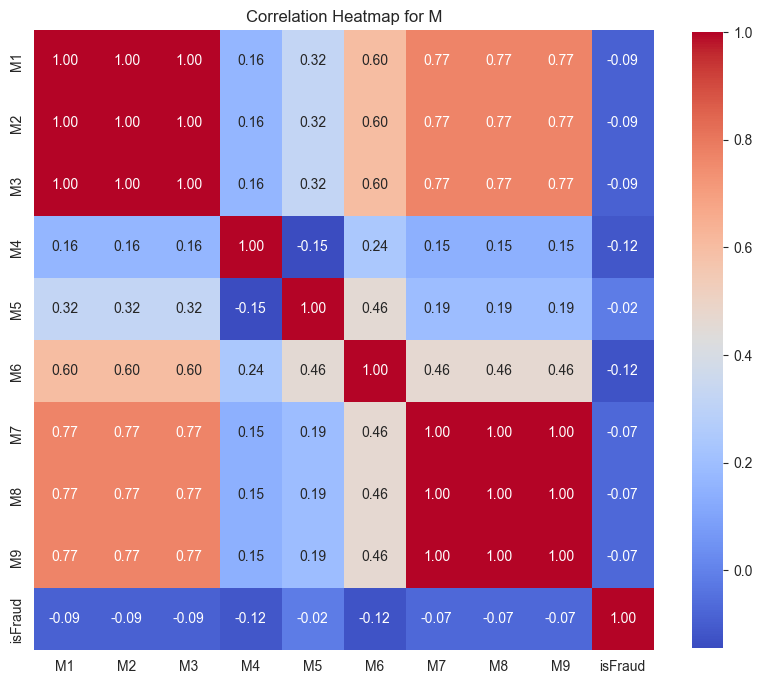

    Missing Values  Percentage (%)
M6          169360       28.678836
M1          271100       45.907136
M2          271100       45.907136
M3          271100       45.907136
M4          281444       47.658753
M8          346252       58.633115
M9          346252       58.633115
M7          346265       58.635317
M5          350482       59.349409


Columns 50 percent of whose data is not nan :
['M1', 'M2', 'M3', 'M4', 'M6']


         M1   M2   M3  M4   M5   M6   M7   M8   M9  isFraud
0         1    1    1   0    0    1 -999 -999 -999        0
1      -999 -999 -999   1    1    1 -999 -999 -999        0
2         1    1    1   1    0    0    0    0    0        0
3      -999 -999 -999   1    1    0 -999 -999 -999        0
4      -999 -999 -999   2 -999 -999 -999 -999 -999        0
...     ...  ...  ...  ..  ...  ...  ...  ...  ...      ...
590535    1    1    1   1    1    0    0    0    1        0
590536    1    0    0   1    0    1    0    0    0        0
590537    1    0    0   2 -99

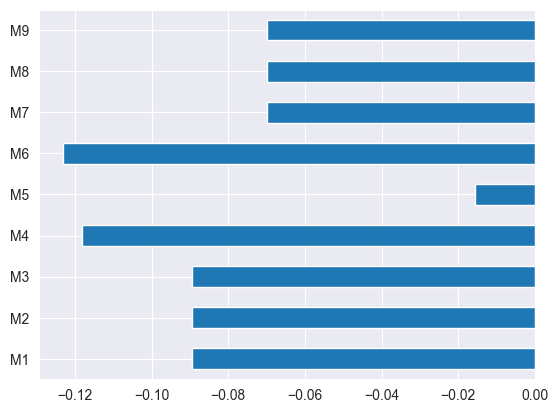

In [95]:
col_eda('M',1,9)